# RUKindaHomeless - Data Visualizations
## Comprehensive Analysis of New Brunswick Housing Data

This notebook creates 6 comprehensive charts for analyzing apartment rental listings in the New Brunswick, NJ area.

## Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Configure matplotlib to display plots inline
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Load the data
print("📂 Loading data...")
df = pd.read_csv('../data/listings.csv')

# Clean the rent column (remove commas and convert to float)
df['rent'] = df['rent'].astype(str).str.replace(',', '').astype(float)

# Calculate price per square foot
df['price_per_sqft'] = df['rent'] / df['sqft']

print(f"✅ Loaded {len(df)} listings")
print(f"\n📋 Columns: {list(df.columns)}")

# Display first few rows
df.head()

📂 Loading data...
✅ Loaded 60 listings

📋 Columns: ['address', 'rent', 'BR', 'Ba', 'sqft', 'url', 'source', 'price_per_sqft']


,address,rent,BR,Ba,sqft,url,source,price_per_sqft
0,"33 Paul Robeson Blvd, New Brunswick, NJ 08901",1992.0,2,2.0,929,https://cnj.craigslist.org/apa/d/new-brunswick...,craigslist,2.144241
1,"33 Paul Robeson Blvd, New Brunswick, NJ 08901",1992.0,3,2.0,929,https://cnj.craigslist.org/apa/d/new-brunswick...,craigslist,2.144241
2,"33 Paul Robeson Blvd, New Brunswick, NJ 08901",1663.0,1,1.0,727,https://cnj.craigslist.org/apa/d/new-brunswick...,craigslist,2.287483
3,"620 Somerset St, New Brunswick, NJ 08901",3100.0,3,2.0,1071,https://cnj.craigslist.org/apa/d/new-brunswick...,craigslist,2.894491
4,"33 Paul Robeson Blvd, New Brunswick, NJ 08901",1992.0,2,2.0,939,https://cnj.craigslist.org/apa/d/new-brunswick...,craigslist,2.121406


## Chart 1: Average Rent by Number of Bedrooms

This bar chart shows how average rent increases with the number of bedrooms.

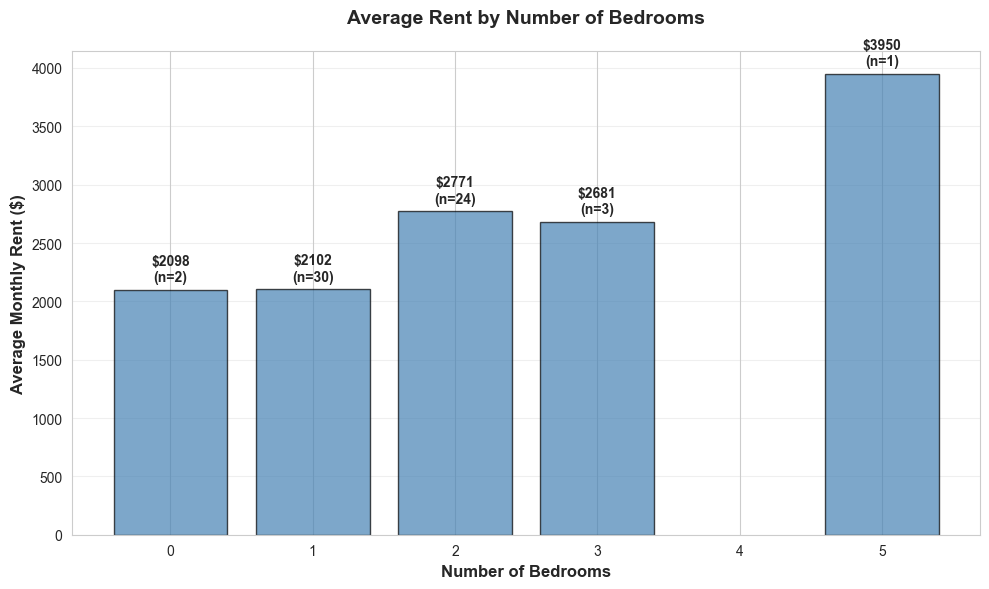

✅ Chart 1 displayed


In [3]:
plt.figure(figsize=(10, 6))

# Calculate average rent and count by bedroom
avg_rent_by_br = df.groupby('BR')['rent'].agg(['mean', 'count']).reset_index()

# Create bar chart
bars = plt.bar(avg_rent_by_br['BR'], avg_rent_by_br['mean'], 
               color='steelblue', edgecolor='black', alpha=0.7)

# Add value labels on bars
for i, (br, rent, count) in enumerate(zip(avg_rent_by_br['BR'], 
                                           avg_rent_by_br['mean'], 
                                           avg_rent_by_br['count'])):
    plt.text(br, rent + 50, f'${rent:.0f}\n(n={count})', 
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Number of Bedrooms', fontsize=12, fontweight='bold')
plt.ylabel('Average Monthly Rent ($)', fontsize=12, fontweight='bold')
plt.title('Average Rent by Number of Bedrooms', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Chart 1 displayed")

## Chart 2: Rent vs Square Footage with Trend Line

This scatter plot reveals the relationship between apartment size and rent, colored by bedroom count.

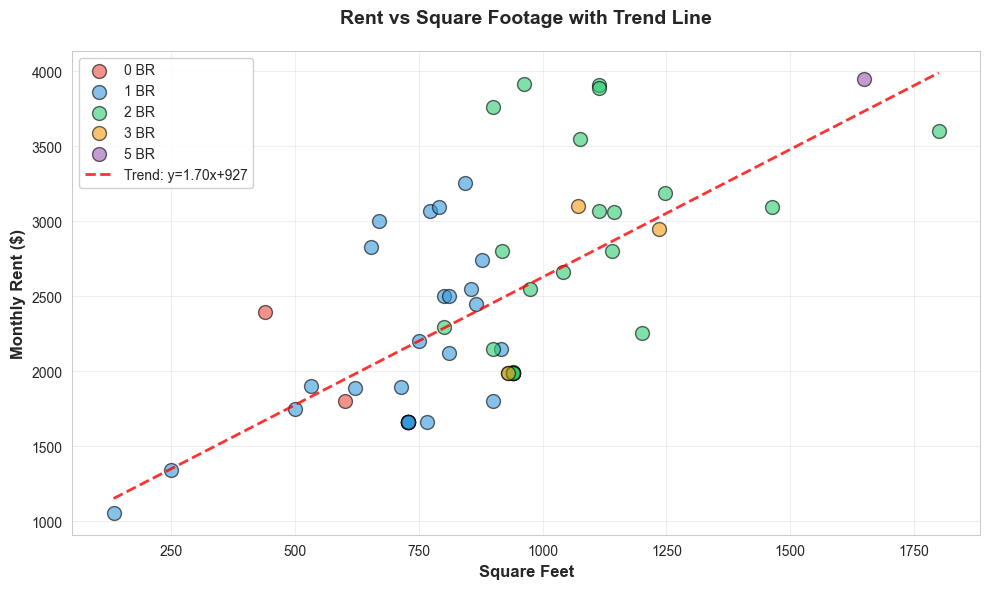

✅ Chart 2 displayed

📈 Trend analysis: For every additional square foot, rent increases by approximately $1.70


In [4]:
plt.figure(figsize=(10, 6))

# Define colors for each bedroom count
colors = {0: '#e74c3c', 1: '#3498db', 2: '#2ecc71', 3: '#f39c12', 5: '#9b59b6'}

# Plot scatter for each bedroom count
for br in sorted(df['BR'].unique()):
    subset = df[df['BR'] == br]
    plt.scatter(subset['sqft'], subset['rent'], 
                c=colors.get(br, '#95a5a6'), 
                label=f'{br} BR', s=100, alpha=0.6, edgecolors='black')

# Add trend line
z = np.polyfit(df['sqft'], df['rent'], 1)
p = np.poly1d(z)
plt.plot(df['sqft'].sort_values(), p(df['sqft'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.0f}')

plt.xlabel('Square Feet', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Rent ($)', fontsize=12, fontweight='bold')
plt.title('Rent vs Square Footage with Trend Line', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='upper left', framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Chart 2 displayed")
print(f"\n📈 Trend analysis: For every additional square foot, rent increases by approximately ${z[0]:.2f}")

## Chart 3: Rent Distribution by Data Source

This box plot compares rent distributions across different data sources (Craigslist, Trulia, etc.).

/var/folders/xy/2zkls49j5d71x6npr2wjj2cr0000gn/T/ipykernel_52956/2130422654.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_by_source, labels=sources, patch_artist=True,


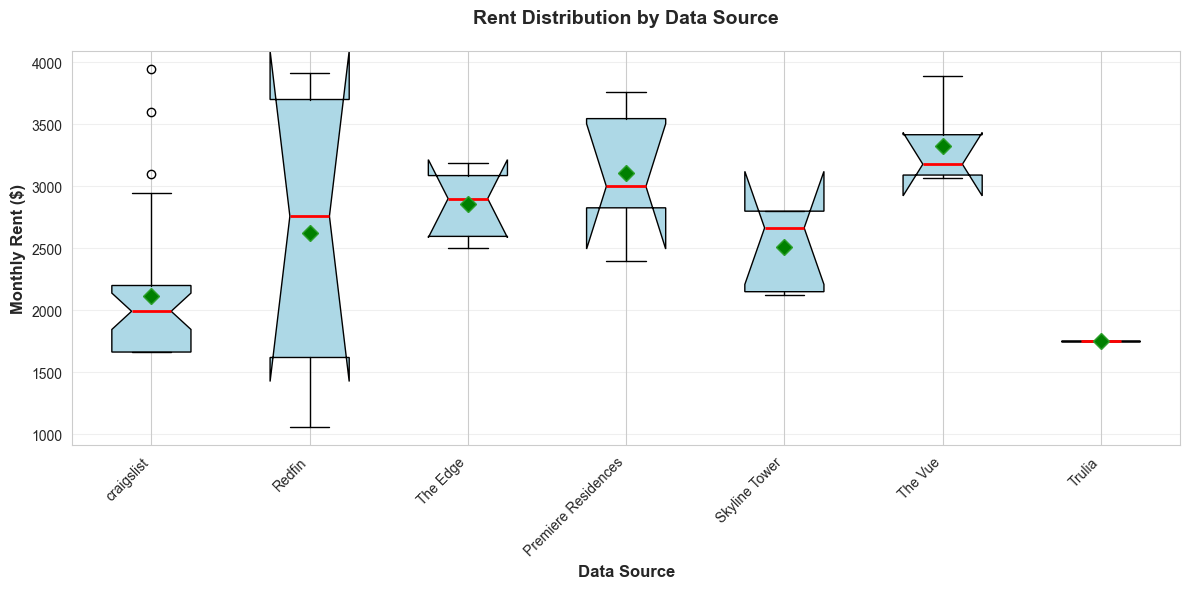

✅ Chart 3 displayed

📊 Legend: Red line = median, Green diamond = mean


In [5]:
plt.figure(figsize=(12, 6))

# Prepare data by source
sources = df['source'].value_counts().index.tolist()
data_by_source = [df[df['source'] == source]['rent'].values for source in sources]

# Create box plot
bp = plt.boxplot(data_by_source, labels=sources, patch_artist=True,
                  notch=True, showmeans=True,
                  boxprops=dict(facecolor='lightblue', edgecolor='black'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'),
                  medianprops=dict(color='red', linewidth=2),
                  meanprops=dict(marker='D', markerfacecolor='green', markersize=8))

plt.xlabel('Data Source', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Rent ($)', fontsize=12, fontweight='bold')
plt.title('Rent Distribution by Data Source', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Chart 3 displayed")
print("\n📊 Legend: Red line = median, Green diamond = mean")

## Chart 4: Distribution of Listings by Data Source

This pie chart shows what percentage of our listings come from each data source.

In [ ]:
plt.figure(figsize=(10, 8))

# Get source counts
source_counts = df['source'].value_counts()
colors_pie = plt.cm.Set3(range(len(source_counts)))

# Create pie chart
wedges, texts, autotexts = plt.pie(source_counts.values, 
                                     labels=source_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_pie,
                                     startangle=90,
                                     explode=[0.05] * len(source_counts),
                                     shadow=True)

# Style percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Add legend with counts
legend_labels = [f'{source}: {count} listings' 
                 for source, count in source_counts.items()]
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Distribution of Listings by Data Source', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Chart 4 displayed")

## Chart 5: Feature Correlation Matrix

This heatmap reveals relationships between different numerical features in our dataset.

In [ ]:
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
corr_data = df[['BR', 'Ba', 'sqft', 'rent', 'price_per_sqft']].corr()

# Create heatmap
sns.heatmap(corr_data, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Chart 5 displayed")
print("\n📊 Correlation insights:")
print(f"   • Strongest correlation with rent: sqft ({corr_data.loc['sqft', 'rent']:.3f})")
print(f"   • BR and rent correlation: {corr_data.loc['BR', 'rent']:.3f}")

## Chart 6: Summary Statistics Table

A visual table displaying key statistical measures for all numeric features.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Generate summary statistics
summary_stats = df[['rent', 'BR', 'Ba', 'sqft', 'price_per_sqft']].describe()
summary_stats = summary_stats.round(2)

# Create table
table = ax.table(cellText=summary_stats.values,
                 rowLabels=summary_stats.index,
                 colLabels=summary_stats.columns,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15] * len(summary_stats.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(len(summary_stats.columns)):
    table[(0, i)].set_facecolor('#4472C4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style row labels
for i in range(len(summary_stats.index)):
    table[(i+1, -1)].set_facecolor('#D9E1F2')
    table[(i+1, -1)].set_text_props(weight='bold')

plt.title('Summary Statistics for All Listings', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Chart 6 displayed")

## Key Insights from Data Analysis

In [ ]:
print("=" * 70)
print("KEY INSIGHTS FROM DATA")
print("=" * 70)
print(f"\n📊 Dataset Overview:")
print(f"   • Total Listings: {len(df)}")
print(f"   • Data Sources: {df['source'].nunique()}")
print(f"   • Bedroom Types: {sorted(df['BR'].unique())}")

print(f"\n💰 Rent Statistics:")
print(f"   • Average Rent: ${df['rent'].mean():.2f}")
print(f"   • Median Rent: ${df['rent'].median():.2f}")
print(f"   • Rent Range: ${df['rent'].min():.2f} - ${df['rent'].max():.2f}")
print(f"   • Standard Deviation: ${df['rent'].std():.2f}")

print(f"\n📐 Size Statistics:")
print(f"   • Average Square Feet: {df['sqft'].mean():.0f}")
print(f"   • Average Price/Sqft: ${df['price_per_sqft'].mean():.2f}")

print(f"\n🏆 Most Common:")
print(f"   • Source: {df['source'].mode()[0]} ({df['source'].value_counts().iloc[0]} listings)")
print(f"   • Bedroom Count: {df['BR'].mode()[0]} BR ({df['BR'].value_counts().iloc[0]} listings)")

print(f"\n💎 Best Values (Lowest Price/Sqft):")
best_values = df.nsmallest(5, 'price_per_sqft')[['address', 'rent', 'BR', 'sqft', 'price_per_sqft']]
for idx, row in best_values.iterrows():
    print(f"   • {row['address'][:50]}... - ${row['rent']:.0f} ({row['BR']} BR, {row['sqft']} sqft) - ${row['price_per_sqft']:.2f}/sqft")

print("\n" + "=" * 70)
print("✅ VISUALIZATION ANALYSIS COMPLETE!")
print("=" * 70)

## Additional Analysis: Rent by Bedroom and Source

In [6]:
# Detailed breakdown
print("\n📊 Average Rent by Bedroom Count:")
bedroom_stats = df.groupby('BR').agg({
    'rent': ['mean', 'median', 'min', 'max', 'count']
}).round(2)
print(bedroom_stats)

print("\n📊 Average Rent by Source:")
source_stats = df.groupby('source').agg({
    'rent': ['mean', 'median', 'count']
}).round(2)
print(source_stats)


📊 Average Rent by Bedroom Count:
       rent                              
       mean  median     min     max count
BR                                       
0   2098.50  2098.5  1800.0  2397.0     2
1   2102.13  1897.5  1059.0  3259.0    30
2   2771.12  2732.5  1992.0  3918.0    24
3   2680.67  2950.0  1992.0  3100.0     3
5   3950.00  3950.0  3950.0  3950.0     1

📊 Average Rent by Source:
                        rent              
                        mean  median count
source                                    
Premiere Residences  3106.40  3000.0     5
Redfin               2625.00  2759.5     6
Skyline Tower        2508.00  2665.0     5
The Edge             2856.50  2901.5     6
The Vue              3329.50  3179.0     4
Trulia               1749.00  1749.0     1
craigslist           2113.09  1992.0    33
